In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data=pd.read_csv(
    'C:/Users/konar/Desktop/Блок 3. Python и математика для анализа данных/15. Лабораторная работа по статистике/Домашнее задание к уроку 15/auto.csv'
)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Рассчитать основные статестические парамметры

Среднее значение

In [3]:
data_columns=['normalized-losses','wheel-base','bore','stroke',
          'compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

a=pd.DataFrame({'Name':data_columns,
                'Медиана':[statistics.mean(data[x]) for x in data_columns],
                'Мода':[statistics.mode(data[x]) for x in data_columns],
                'Max':[max(data[x]) for x in data_columns],
                'Min':[min(data[x]) for x in data_columns],
                'Среднее откланение':[statistics.pstdev(data[x]) for x in data_columns]
               })
a

,Name,Медиана,Мода,Max,Min,Среднее откланение
0,normalized-losses,126.365854,161.00,256.00,65.00,35.351859
1,wheel-base,98.756585,94.50,120.90,86.60,6.007070
2,bore,3.324878,3.62,3.94,2.54,0.272382
3,stroke,3.253366,3.40,4.17,2.07,0.313171
4,compression-ratio,10.142537,9.00,23.00,7.00,3.962341
5,horsepower,106.048780,68.00,288.00,48.00,43.362652
6,peak-rpm,5131.463415,5500.00,6600.00,4150.00,479.758887
7,city-mpg,25.219512,31.00,49.00,13.00,6.526166
8,highway-mpg,30.751220,25.00,54.00,16.00,6.869626
9,price,13312.712195,6785.00,45400.00,5118.00,8082.686174


In [46]:
stat=data.describe()
stat.drop('count',axis=0)
stat.drop('symboling',axis=1)
pd.set_option('display.float_format', '{:.3f}'.format)
stat

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000,205.000
mean,0.834,126.366,98.757,174.049,65.908,53.725,2555.566,126.907,3.325,3.253,10.143,106.049,5131.463,25.220,30.751,13312.712
std,1.245,35.438,6.022,12.337,2.145,2.444,520.680,41.643,0.273,0.314,3.972,43.469,480.933,6.542,6.886,8102.472
min,-2.000,65.000,86.600,141.100,60.300,47.800,1488.000,61.000,2.540,2.070,7.000,48.000,4150.000,13.000,16.000,5118.000
25%,0.000,101.000,94.500,166.300,64.100,52.000,2145.000,97.000,3.130,3.110,8.600,70.000,4800.000,19.000,25.000,7775.000
50%,1.000,122.000,97.000,173.200,65.500,54.100,2414.000,120.000,3.310,3.290,9.000,95.000,5200.000,24.000,30.000,10295.000
75%,2.000,150.000,102.400,183.100,66.900,55.500,2935.000,141.000,3.580,3.410,9.400,120.000,5500.000,30.000,34.000,16503.000
max,3.000,256.000,120.900,208.100,72.300,59.800,4066.000,326.000,3.940,4.170,23.000,288.000,6600.000,49.000,54.000,45400.000


<function matplotlib.pyplot.show(*args, **kw)>

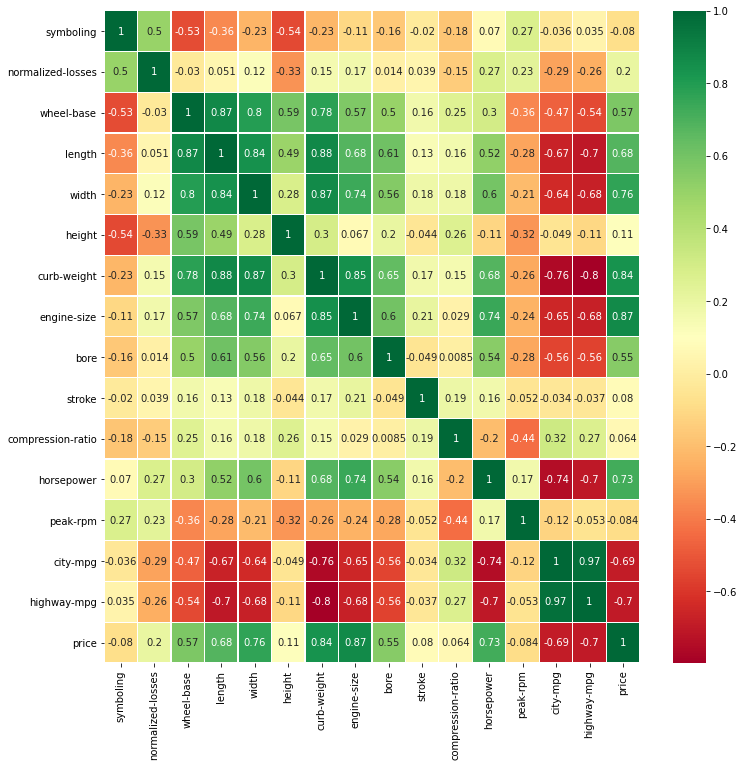

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show

# Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

In [48]:
data_price=data['price']

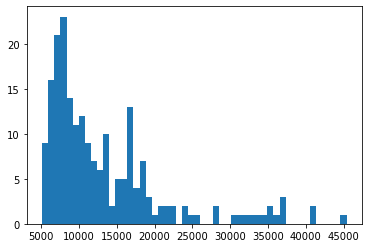

In [6]:
count,bins,ignored=plt.hist(data_price,50)
plt.show()

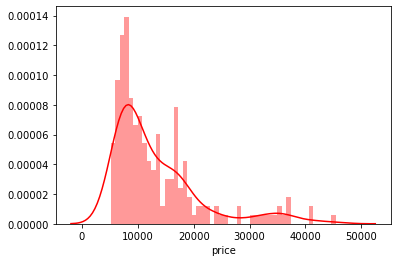

In [7]:
sns.distplot(data_price,50,color='r')
plt.show()

In [8]:
from scipy.stats import t, skew, kurtosis
print(skew(data_price),kurtosis(data_price))

1.7534486514523662 2.848082544390688


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

train,test=train_test_split(data,test_size=0.2)
city_data=train['city-mpg']
highway_data=train['highway-mpg']
model=LinearRegression()
result=model.fit(np.array(city_data).reshape(-1,1),highway_data)

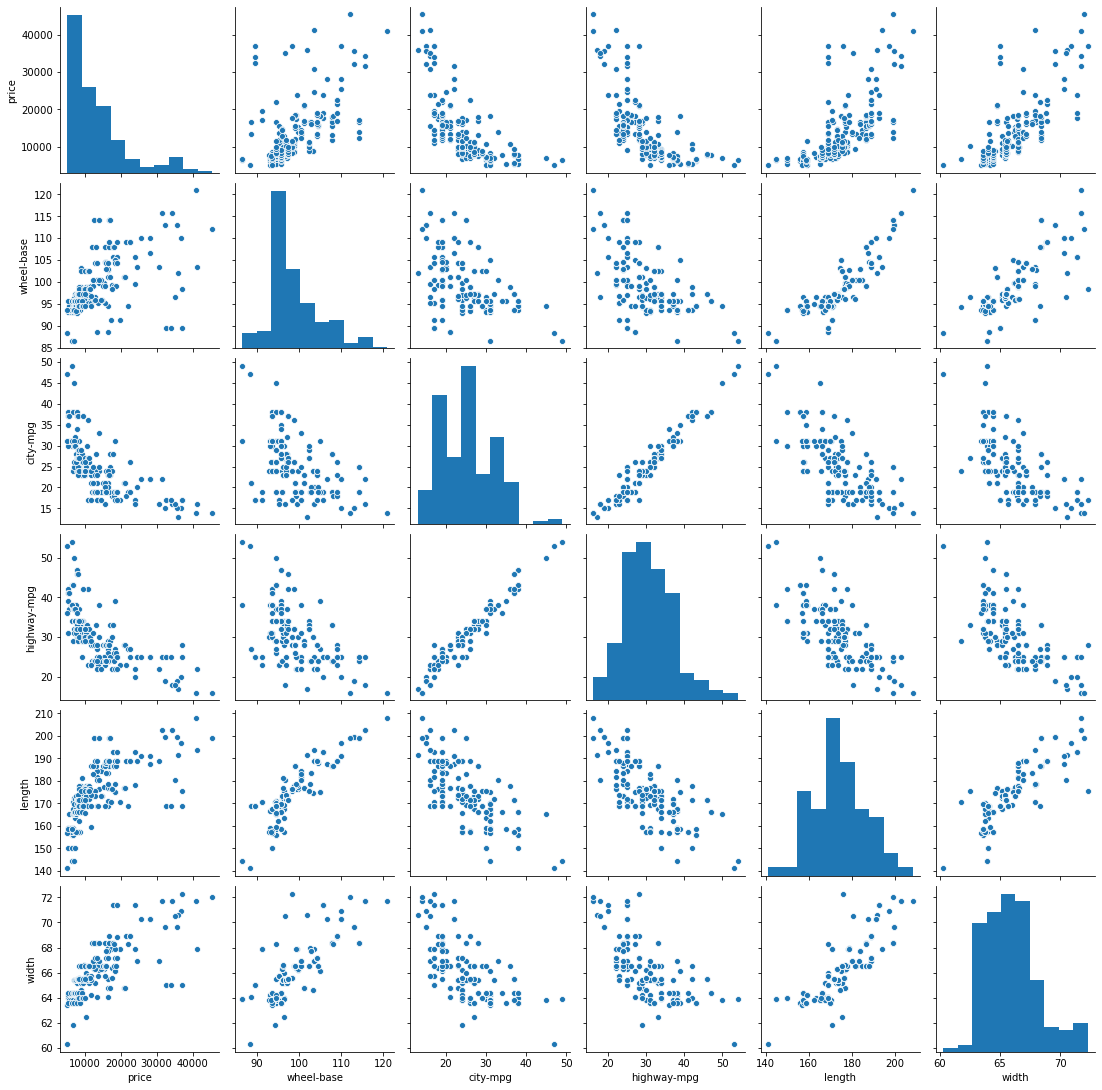

In [51]:
sns.pairplot(data, vars=['price','wheel-base','city-mpg',
                         'highway-mpg','length','width'],kind='scatter')
plt.show()

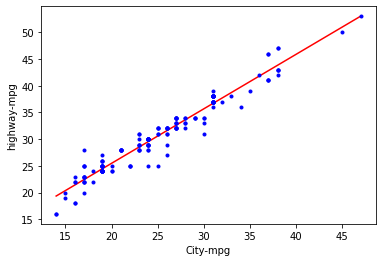

In [10]:
plt.xlabel('City-mpg')
plt.ylabel('highway-mpg')
x=np.linspace(min(city_data),max(city_data),100)
y=model.coef_*x+model.intercept_
plt.plot(x,y,'r-')
plt.plot(city_data,highway_data,'b.')
plt.show()

In [11]:
y_pred=model.predict(np.array(test['city-mpg']).reshape(-1,1))
df=pd.DataFrame({'Actual':test['city-mpg'],'Predicted':y_pred})

In [12]:
from sklearn import metrics
test_city_data=test['city-mpg']
print('Mean Absolute Error',
     metrics.mean_absolute_error(test_city_data,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(test_city_data,y_pred)) 
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(test_city_data,y_pred)))

Mean Absolute Error 5.585513184116836
Mean Squared Error: 31.217361770099117
Root Mean Squared Error: 5.58724992908847


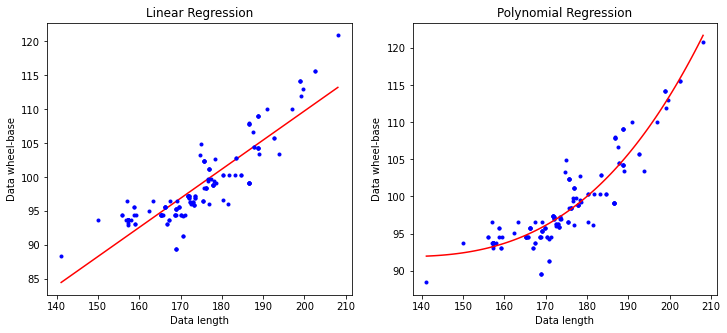

In [13]:
from sklearn.preprocessing import PolynomialFeatures

train_length=train['length']
train_wheel=train['wheel-base']

poly_features=PolynomialFeatures(degree=3)
x_poly=poly_features.fit_transform(np.array(train_length).reshape(-1,1))
model_poly=LinearRegression()
model_poly.fit(x_poly,train_wheel)

x_plot=np.linspace(min(train_length),max(train_length),100)
x_plot_poly=poly_features.fit_transform(np.array(x_plot).reshape(-1,1))

model_=LinearRegression()
result_=model_.fit(np.array(train_length).reshape(-1,1),train_wheel)

fig_=plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Linear Regression')
plt.xlabel('Data length')
plt.ylabel('Data wheel-base')
x=np.linspace(min(train_length),max(train_length),100)
y=model_.coef_*x+model_.intercept_
plt.plot(x,y,'-r')

plt.plot(train_length,train_wheel,'b.')


plt.subplot(1,2,2)
plt.title('Polynomial Regression')
plt.xlabel('Data length')
plt.ylabel('Data wheel-base')
plt.plot(train_length,train_wheel,'b.')
plt.plot(x_plot_poly[:,1],model_poly.predict(x_plot_poly),'-r')


plt.show()


In [54]:
y_pred_poly=model_poly.predict(poly_features.fit_transform(np.array(test['length']).reshape(-1,1)))
df=pd.DataFrame({'Actual':test['wheel-base'],'Predicted':y_pred})
predarray=model_poly.predict(poly_features.fit_transform(np.array(test['length']).reshape(-1,1)))

#Data for manual checking of values


#df = pd.DataFrame({'X_data':test['length'],'Actual':test['wheel-base'], 'Predicted':predarray})
#df

print(np.sqrt(metrics.mean_squared_error(test['wheel-base'],predarray))/np.mean(data['wheel-base'])*100,'%')


3.088829441198614 %


# T-test

In [58]:
import scipy.stats as sts

In [56]:
atmo_city=data[data['aspiration']=='std']['city-mpg']
turbo_city=data[data['aspiration']=='turbo']['city-mpg']

In [60]:
sts.ttest_ind(atmo_city, turbo_city)

Ttest_indResult(statistic=2.944124472348474, pvalue=0.0036162514551477372)

In [62]:
len(atmo_city)

168

In [64]:
len(turbo_city)

37

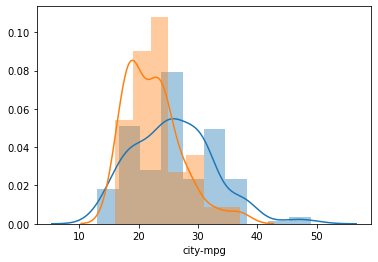

In [70]:
sns.distplot(atmo_city)
sns.distplot(turbo_city)

plt.show()

In [75]:
price_gas=data.loc[data['fuel-type']=='gas','price']
price_diesel=data.loc[data['fuel-type']=='diesel','price']

sts.ttest_ind(price_gas,price_diesel)

Ttest_indResult(statistic=-1.4715061487687495, pvalue=0.1427027883743746)

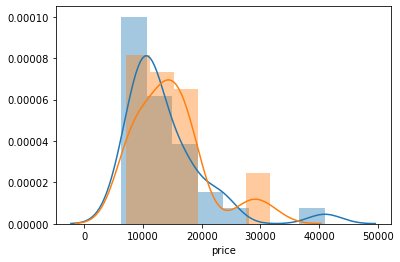

In [83]:
sns.distplot(price_gas)
sns.distplot(price_diesel)

plt.show()

In [82]:
price_diesel=price_diesel.sample(n=30,replace=True)
price_gas=price_gas.sample(n=30,replace=True)

In [84]:
sts.ttest_ind(price_gas,price_diesel)

Ttest_indResult(statistic=-0.5715001910571432, pvalue=0.5698687982420757)